In [1]:
import pandas as pd
import numpy as np
import sys, os
import seaborn as sns
from matplotlib import pyplot as plt
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts import project_functions

## Load the data insurance.s

In [2]:
df = project_functions.load_clean_df('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


There are no null values in the dataset

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## I will be using data chaining to demonstrate how many people are smokers in the the entire sample

In [11]:
print ('There are', project_functions.show_num_smoker(df), 'smoker in the sample')

There are 274 smoker in the sample


In [12]:
project_functions.show_smoker_table(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


## I will be comparing how many people are smokers among the top 25% sample with highest charges with comparison to original sample

#### Step 1) 
I derived this EDA from looking the data distribution of my dataframe and see that the medical cost of people goes up much higher from 75% to max of medical charges of the data distribution. 

In [13]:
df.describe(include ='all') 

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


#### Statistics to show data distribution 
- mean medical cost is 13270
- minimum medical cost is 1121
- median medical cost is 9382
- max medical cost is 63770

### I use data wrangling to re-sort the table and looked at the top 25% of the sample with the highest medical cost, and looked at how many people are smoker out of the sample

In [6]:
print("there are", project_functions.how_many_smoker_in_25_sample(df),'people that are smokers among the top 25% sample with highest charges')

there are 255 people that are smokers among the top 25% sample with highest charges


## EDA to see what % of people are smoker between original sample and top 25% sample with highest medical charges

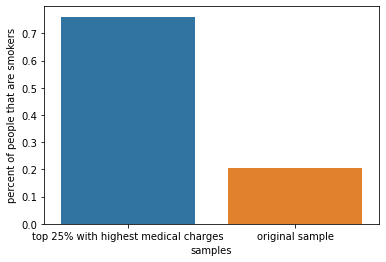

In [5]:
project_functions.compare_smoker(df)

From my EDA analysis, I see that the top 25% of the entire sample with highest medical charges have more than a significant amount of people that are smokers compared to the orginal sample therefore I will find the correlation between smoker and medical charges in my Step 5

### Now, I will try to see do smoker pay more on average than non-smokers then?

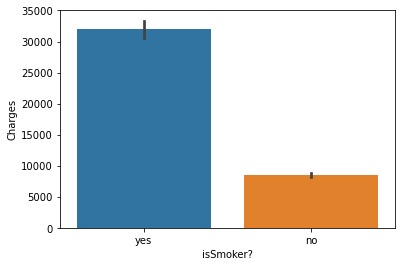

In [26]:
project_functions.cost_is_smoker(df)

Turns out they do, so we need to verify the relationship in task 5 later

#### Now I will do the same to see if overweight or underweight distribution those over 30 bmi or lower than 15 bmi have an influence on the two samples between higher charges and lower charges

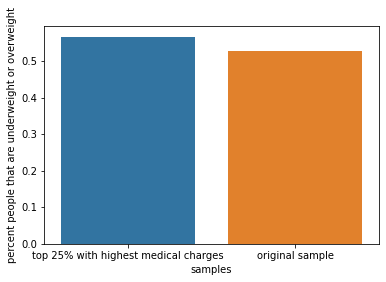

In [3]:
project_functions.compare_weight(df)

I notice that the distribution is not siginificantly higher in the 25 % sample but there is still more obese people in those sample, so I will still conduct an analysis as my research question in task 5

##Now let's look at how age play a role

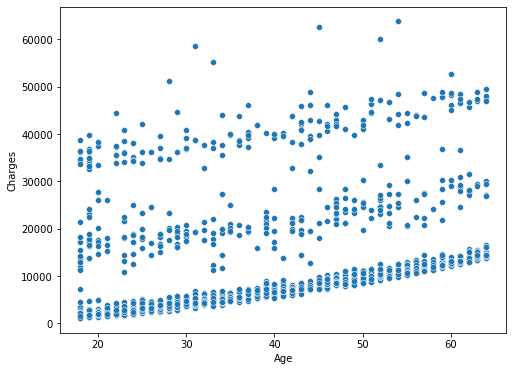

In [12]:
project_functions.cost_by_age(df)

age relationship is pretty linear, but when evaluating risk_score, we might need to understand more about how age play a role.

#### I will use data wrangling to create a new column named risk_score based on the findings from my EDA that smoker play a vital role in medical charge due to having a siginificant more distribution among people that have higher medical charge, and therefore weight is not as important as smoker contribution. I will not consider other attributes like children and their risk_score.

In [4]:
df["Risk Score for Smoking"] = np.where(df['smoker'] == 'yes', 1, 0.5)
df["Risk Score overweight"] = np.where(df['bmi'] > 30, df['Risk Score for Smoking'] + 0.2, df['Risk Score for Smoking'])
df["Risk Score Total"] = np.where(df['bmi'] < 15, df["Risk Score overweight"] + 0.2, df["Risk Score overweight"])
df

,age,sex,bmi,children,smoker,region,charges,Risk Score for Smoking,Risk Score overweight,Risk Score Total
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,1.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.5,0.7,0.7
2,28,male,33.000,3,no,southeast,4449.46200,0.5,0.7,0.7
3,33,male,22.705,0,no,northwest,21984.47061,0.5,0.5,0.5
4,32,male,28.880,0,no,northwest,3866.85520,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.5,0.7,0.7
1334,18,female,31.920,0,no,northeast,2205.98080,0.5,0.7,0.7
1335,18,female,36.850,0,no,southeast,1629.83350,0.5,0.7,0.7
1336,21,female,25.800,0,no,southwest,2007.94500,0.5,0.5,0.5


I will graph a histogram to find out the count distribution for risk score 

(array([503.,   0., 561.,   0.,   0.,   0.,   0., 130.,   0., 144.]),
 array([0.5 , 0.57, 0.64, 0.71, 0.78, 0.85, 0.92, 0.99, 1.06, 1.13, 1.2 ]),
 <BarContainer object of 10 artists>)

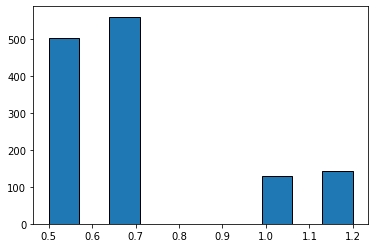

In [5]:
plt.hist(df['Risk Score Total'], edgecolor = 'black')

I notice that majority of people have lower score but there is roughly 1/4 of the people with high risk score. 

This is the big picture of our histogram for every attribute

               age          bmi     children       charges  \
count  1338.000000  1338.000000  1338.000000   1338.000000   
mean     39.207025    30.663397     1.094918  13270.422265   
std      14.049960     6.098187     1.205493  12110.011237   
min      18.000000    15.960000     0.000000   1121.873900   
25%      27.000000    26.296250     0.000000   4740.287150   
50%      39.000000    30.400000     1.000000   9382.033000   
75%      51.000000    34.693750     2.000000  16639.912515   
max      64.000000    53.130000     5.000000  63770.428010   

       Risk Score for Smoking  Risk Score overweight  Risk Score Total  
count             1338.000000            1338.000000       1338.000000  
mean                 0.602392               0.707773          0.707773  
std                  0.201847               0.225089          0.225089  
min                  0.500000               0.500000          0.500000  
25%                  0.500000               0.500000          0.500000  
50%

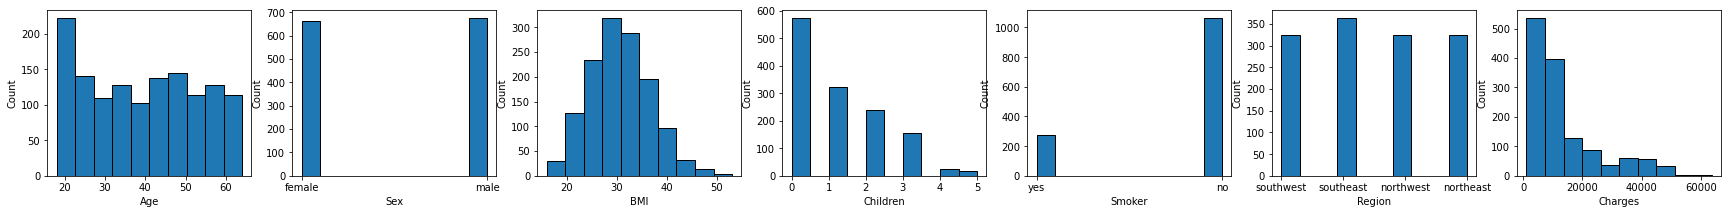

In [25]:
project_functions.display_big_picture(df)

Now I will conduct my analysis to help answer my research question(s):

1.Do smokers pay more on average than non-smokers?

2.What is the correlation between bmi and medical costs?

3.Does number of children have anything to do with charges?

4.What's the relationship between risk factor (compose smoker and unhealthy bmi index) and charges

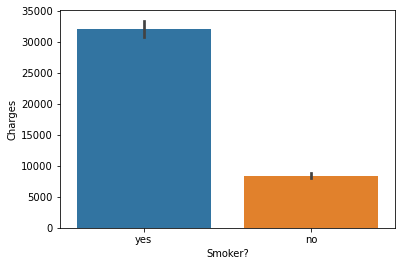

In [6]:
project_functions.charge_smoker(df)

Note that non-smoker pay much less than smokers roughly 4 times less

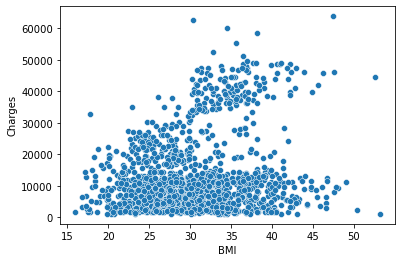

In [7]:
project_functions.charges_bmi(df)

Note that higher bmi does have higher data's with higher medical charges but we will evaluate this together with smoker in the next few cell

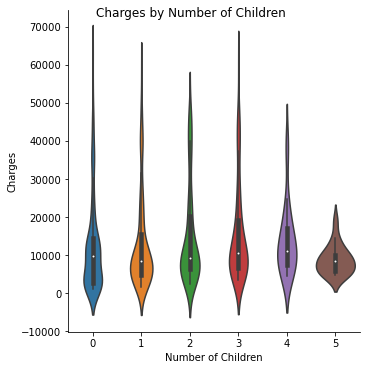

In [8]:
project_functions.cost_by_children(df)

Children does not play a large role in affecting charges

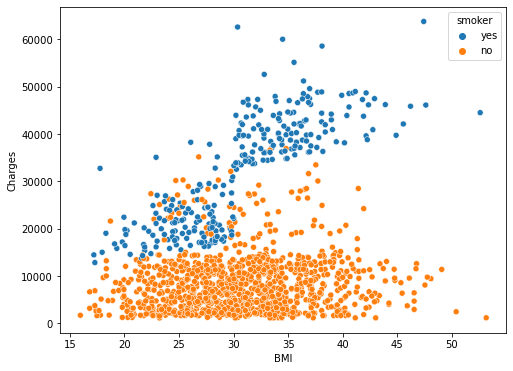

In [9]:
project_functions.cost_by_bmi_and_smoker(df)

From our task 4, we notice that the 25% sample with highest medical charge, while majority were smokers, but the distribution of people with unhealthy bmi was not much different with the original sample. We notice that in our charges_bmi scatterplot, there are signs that higher bmi have more people with higher medical charges, but it is not a consistent relationship, because not neccessarily that a person with higher bmi would have high medical charge. After this graph, it was really obvious that smoker play a huge role in affecting medical charges because the blue dots are the people that are smoker. It is apparant that people with high bmi and smoker will have higher medical charges. So this helps us determine that risk factor of smoking weighs a lot so let's see if it is consistent with risk factor versus medical cost plot. 

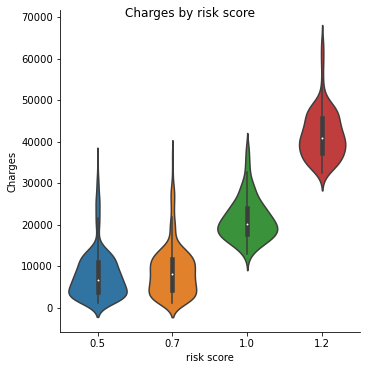

In [10]:
project_functions.cost_by_risk_factor(df)

I was really surprised by this result, because risk_score was something I determine in task 4 because I think smoking was a factor contributing to risk more than bmi, but this result gave me more reassurement that smoking is a underlying contributing factor because higher risk score does yield higher charges 